- edge 검출
- edge : 밝기가 낮은 값에서 높은 값으로, 또는 높은 값에서 낮은 값으로 변하는 지점, 영상을 구성하는 객체 간의 경계선
- Homogeneity(유사 연산자) : 계산하고자 하는 원래의 pixel을 center로 잡고, 그 주변의 pixel 과의 뺄셈을 통해 계산하는 방식, 가장 큰값을 저장, 오래 걸리는 방식
- Difference(차 연산자) : Homogeneity 보다 빠른 방식

In [1]:
import cv2
import numpy as np
img = cv2.imread("d:/data/images/penguin.png")

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
homo = np.zeros(gray.shape, dtype=np.uint8)
diff = np.zeros(gray.shape, dtype=np.uint8)

for i in range(height):
    for j in range(width):
        a = []
        for x in [-1, 0, 1]:
            for y in [-1, 0, 1]:
                if x == 0 and y == 0:
                    continue
                try:
                    center = int(gray[i][j])
                    m = int(gray[i + x][j + y])
                    a.append(abs(center - m))
                except:
                    continue
                homo[i][j] = max(a)

for i in range(height):
    for j in range(width):
        a = []
        for k in [-1, 0, 1]:
            try:
                b = int(abs(gray[i - 1][j - k]))
                c = int(abs(gray[i + 1][j + k]))
                a.append(abs(b - c))
            except:
                continue
        try:
            b = int(abs(gray[i][j - 1]))
            c = int(abs(gray[i][j + 1]))
            a.append(abs(b - c))
        except:
            continue
        diff[i][j] = max(a)

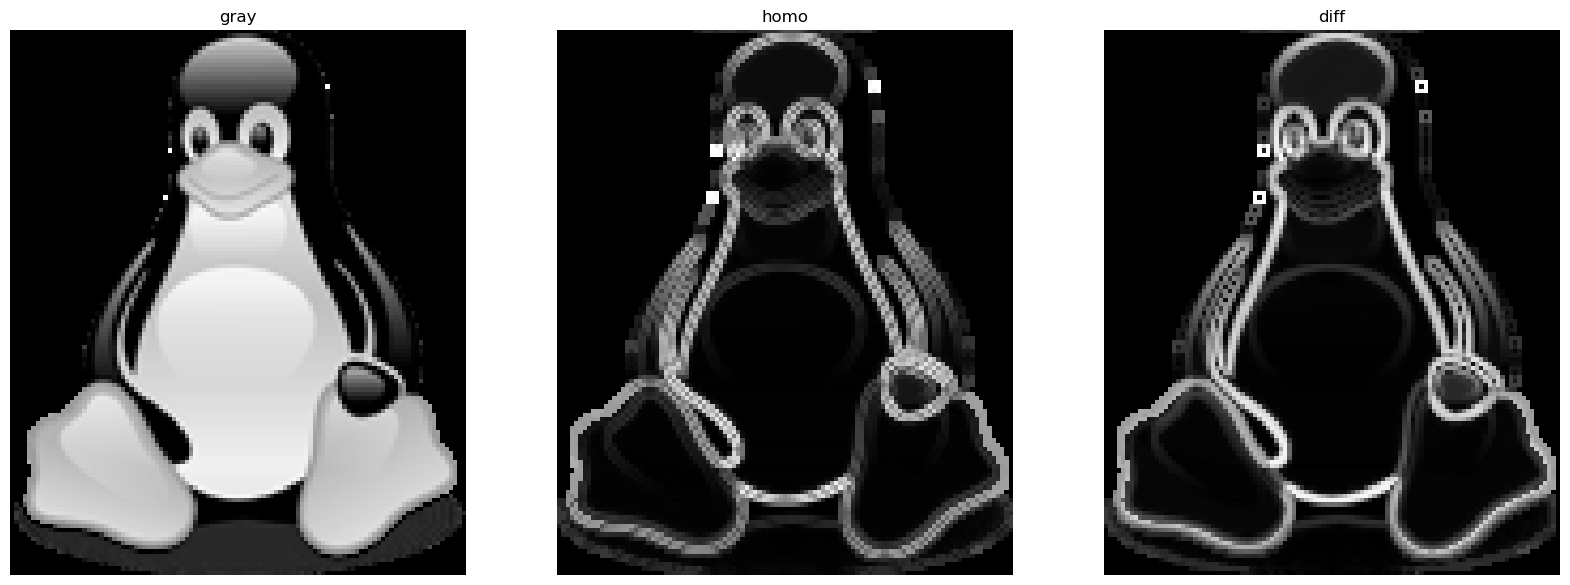

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('gray')
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(homo, cmap='gray')
plt.title('homo')
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(diff, cmap='gray')
plt.title('diff')
plt.axis("off")
plt.show()